In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sklearn 패키지로부터 import tree 
from sklearn import tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
import pydot
from IPython.core.display import Image 
from sklearn.tree import export_graphviz

In [12]:
diabetes = pd.read_csv("diabetes.csv")

In [22]:
data = diabetes.iloc[:,:-1]

In [24]:
target = diabetes.iloc[:,-1]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1234)

In [36]:
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

In [37]:
clf = DecisionTreeClassifier()
no_tune = clf.fit(X_train, y_train)

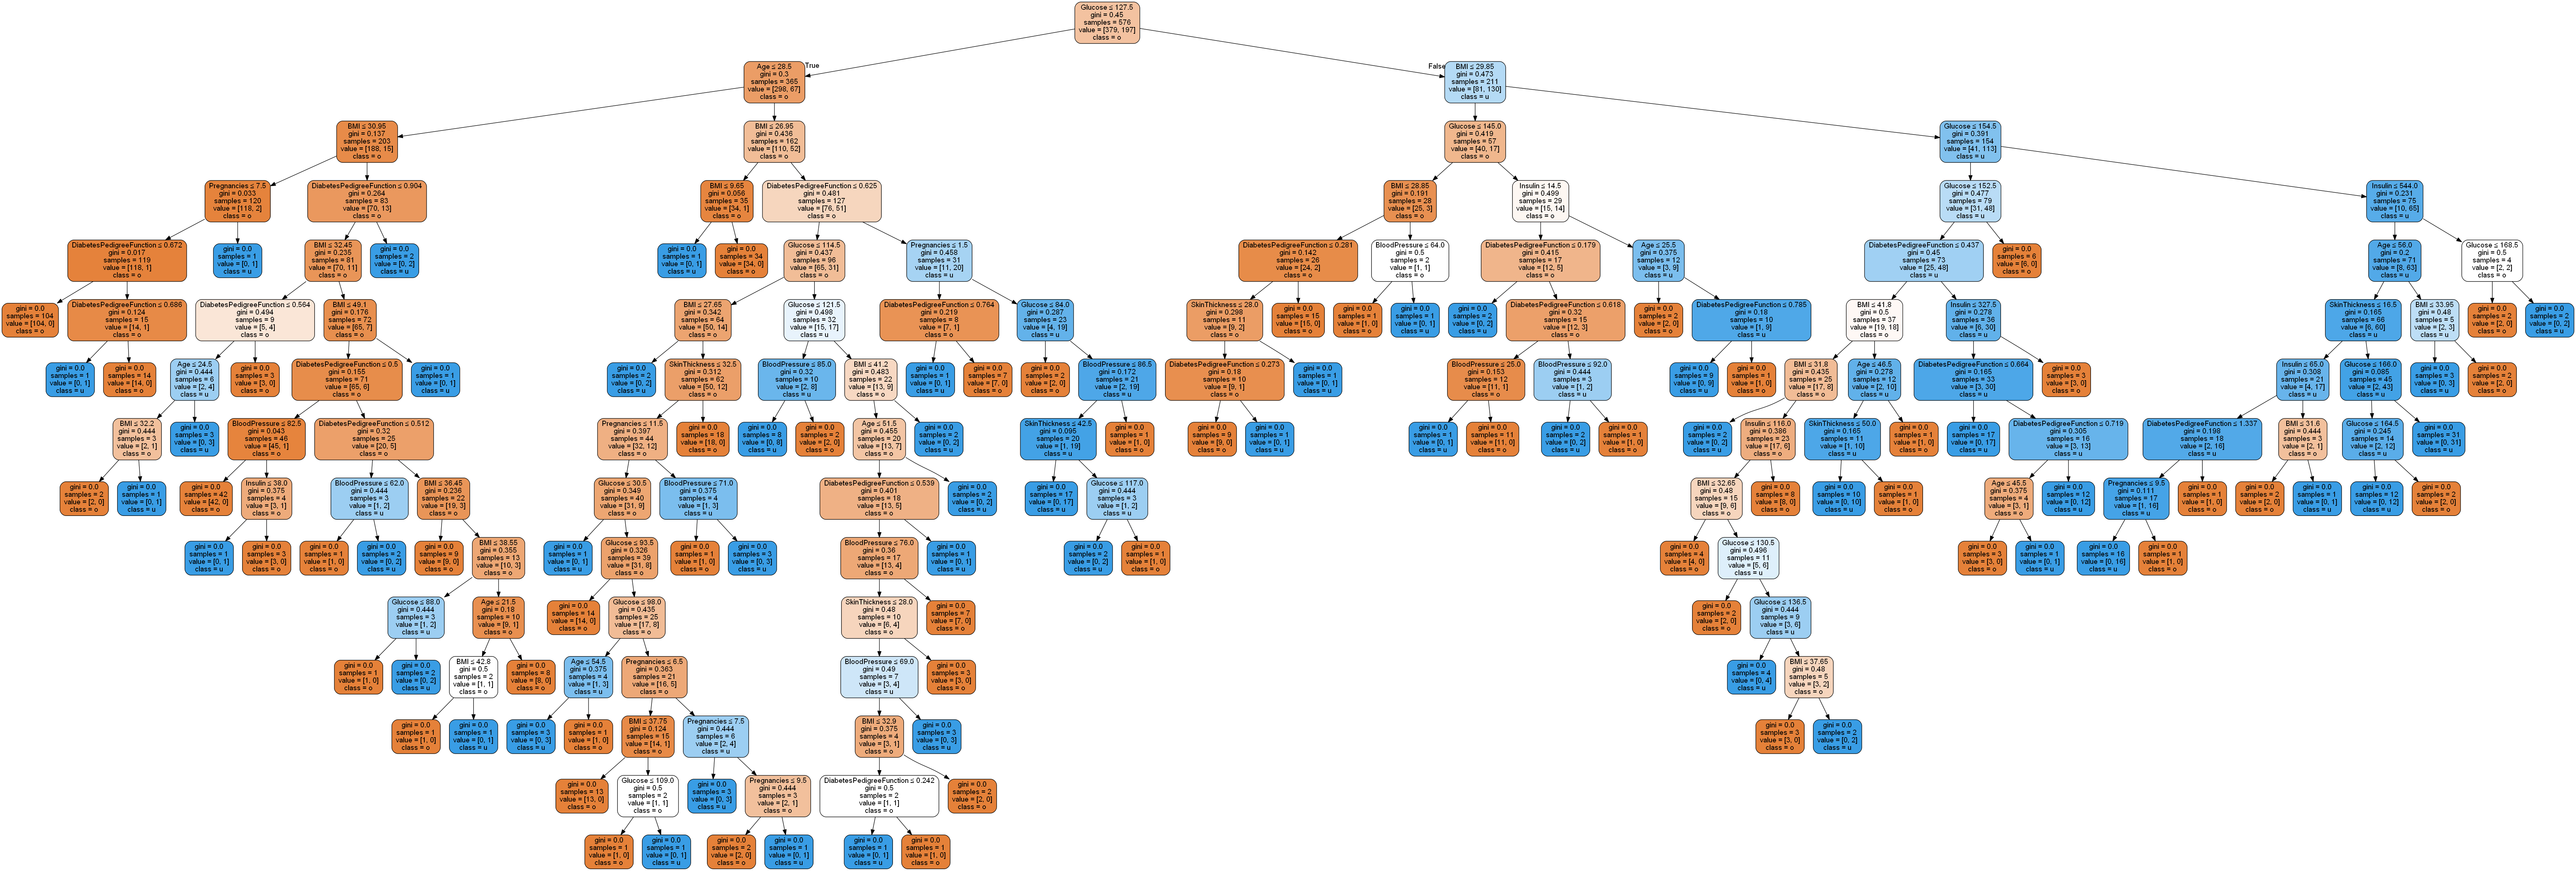

In [38]:
draw_decision_tree(no_tune, data.columns, 'outcome')

In [39]:
from sklearn.metrics import accuracy_score

# Prunning 안한경우 정확도 0.703125

In [41]:
accuracy_score(y_test, clf.predict(X_test))

0.703125

In [42]:
from sklearn.model_selection import GridSearchCV

In [46]:
# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의
# max_depth 와 min_samples_split라는 parameter에 대해 범위 지정
hyperparamters = {'max_depth': list(range(2, 8)),  'min_samples_split': list(range(2, 40))}

# GridSearch 진행
GridCV = GridSearchCV(estimator=no_tune, param_grid=hyperparamters, cv=5, verbose=1)

GridCV.fit(X_train, y_train)
GridCV.best_params_ # 가장 좋은 성능을 보였을 때의 parameter

Fitting 5 folds for each of 228 candidates, totalling 1140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1140 out of 1140 | elapsed:    8.4s finished


{'max_depth': 2, 'min_samples_split': 2}

In [52]:
tree_tuned = DecisionTreeClassifier(max_depth=2, min_samples_split=2, random_state=0)
tuned = tree_tuned.fit(X_train, y_train)

# 가지치기 후

In [54]:
accuracy_score(y_test, tuned.predict(X_test))

0.734375